<a href="https://colab.research.google.com/github/Amrutasutrave/colab_files/blob/main/Hr_comma_sep_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading dataset
df=pd.read_csv('/content/HR_comma_sep.csv')

In [ ]:
#read first few records
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
#checking null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
#describing dataset
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
#showing info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
#showing how many no. of R & C
df.shape

(14999, 10)

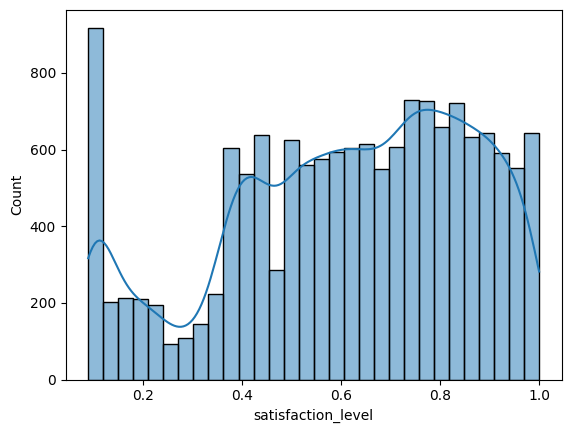

In [ ]:
#histogram
sns.histplot(df['satisfaction_level'],kde=True)
plt.show()

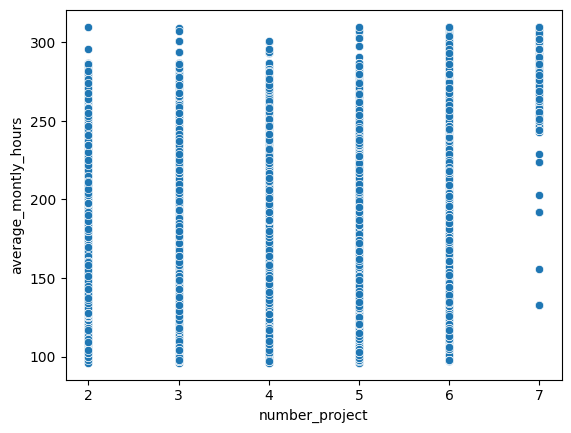

In [ ]:
#scatterplot
sns.scatterplot(x='number_project',y='average_montly_hours',data=df)
plt.show()

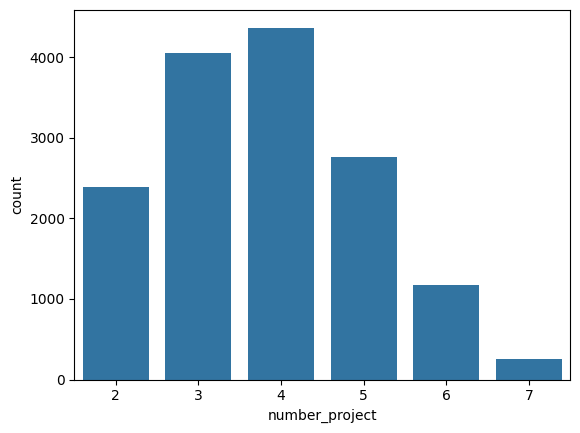

In [ ]:
#countplot
sns.countplot(x='number_project', data=df)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#defining feature & target
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [ ]:
#few col of y
Y.head()

0       low
1    medium
2    medium
3       low
4       low
Name: salary, dtype: object

In [ ]:
#traing & testing dataset
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
#Encoding
#ordinalEncoding
oe=OrdinalEncoder()

In [ ]:
#converting categorical col to numerical using oe
categorical_col=X.select_dtypes(object).columns
categorical_col

Index(['Department'], dtype='object')

In [ ]:
#fit  &  transform
X[categorical_col]=oe.fit_transform(X[categorical_col])
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department
0,0.38,0.53,2,157,3,0,1,0,7.0
1,0.80,0.86,5,262,6,0,1,0,7.0
2,0.11,0.88,7,272,4,0,1,0,7.0
3,0.72,0.87,5,223,5,0,1,0,7.0
4,0.37,0.52,2,159,3,0,1,0,7.0
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8.0
14995,0.37,0.48,2,160,3,0,1,0,8.0
14996,0.37,0.53,2,143,3,0,1,0,8.0
14997,0.11,0.96,6,280,4,0,1,0,8.0


In [ ]:
#scaling
#standardscaler
sc=StandardScaler()

In [ ]:
#fit & transform
X_train = sc.fit_transform(xtrain)
X_test = sc.transform(xtest)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#regression
#Logistic Regression
lr=LogisticRegression()

In [ ]:
lr.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#describing ypredict
ypred=lr.predict(xtest)
ypred

array(['medium', 'low', 'low', ..., 'low', 'medium', 'low'], dtype=object)

In [ ]:
#checking accuracy score
accuracy=accuracy_score(ytest,ypred)
print(f'Accuracy of Logistic Regression Model: {accuracy}')

Accuracy of Logistic Regression Model: 0.5011111111111111
